<a href="https://colab.research.google.com/github/Seth724/object-detection-streamlitapp/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLO-you only look once

In [ ]:
!pip install  ultralytics opencv-python-headless matplotlib pillow #headless meand no ui support,ultralytics-to use YOLO. PILLOW-for image visualization also. #pip install-install external python libraries or packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO#yolo is a pre trained model for object detection
import cv2 #python interface for OpenCV,OpenCV = the whole library cv2 = the Python interface (module) for OpenCV
import matplotlib.pyplot as plt
from PIL import Image #pil for pillow
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
uploaded=files.upload()
file_name=list(uploaded.keys())[0]
print("Uploaded:",file_name)

KeyboardInterrupt: 

In [ ]:
model=YOLO('yolov8n.pt') #yolov8n.pt is a pretrained YOLOv8 model file from the Ultralytics YOLOv8 (You Only Look Once) family.

In [ ]:
results=model(file_name)
annotated=results[0].plot()

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB #BECAUSE MATLPOTLIB EXPECTS only rgb colors
                        ))
plt.axis('off')#hide x and y axis

In [ ]:
uploaded= files.upload()
video_paTH=list(uploaded.keys())[0] #take first video upload
print("Uploaded:",video_paTH)

day 2-object detection video
goal-use yolo to detect objects in video frames

*load and process video file frame-by-frame
*save output video with bounding boxes


In [ ]:
output_path="output_detected.mp4"
cap=cv2.VideoCapture(video_paTH)#OPENS THE VIDEO FOR READING FRAMES,opencv can read its frames one by one
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) #get orig8inal video width and height
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS) or 25.0 #fps-for frame per second,default is given 25
fourcc=cv2.VideoWriter_fourcc(*'mp4v') #save as a mp4 file
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))#writea same format video

In [ ]:
frame_count=0
while True: #infinite loop
  ret,frame=cap.read() # ret is a boolean value,if a frame return ret is true
  if not ret:# if no frame loop will break inn here
    break
  results=model(frame)
  annotated=results[0].plot()#draw a boundary sorrounding the object which detect and also tell the accuracy
  out.write(annotated)#save the annotated box tothe original video
  frame_count+=1 #further moving  untill reach all frames
  if frame_count%100==0: #how many frames we want
    print(f"PROCESSED (frame_count) frames")
  cap.release() #close
  out.release() #colse output video also,close video writer once the orocess is finished

  print("Video Saved",output_path)
  files.download(output_path) #a direct downlad link for the file is created in collab run time



day 3-live web cam detection
goal-detect objects frm web cam feed in real time
*use openCV's webcam capture
*display detection in real-time window

In [ ]:
# !pip install -q ultralytics opencv-python-headless matplotlib pillow

# from ultralytics import YOLO#yolo is a pre trained model for object detection
# import cv2 #python interface for OpenCV,OpenCV = the whole library cv2 = the Python interface (module) for OpenCV
# import matplotlib.pyplot as plt
# from PIL import Image #pil for pillow
# from google.colab import output
# from base 64 import b64decode #for web cam supporting

# model=YOLO('yolov8n.pt')

# #captures an image and saves it
# def take_photo(filename='snapshot.jpg') #all can be used.all are supported files.
#   js = """  #a trck to use web cam inn google colab id.if use vs code,jupiter,..like local hosts can directly acess web cam do not need to do this code.
#    async function takePhoto() {
#      const div = document.createElement('div');
#      const capture = document.createElement('button');
#      capture.textContent = 'Capture';
#      div.appendChild(capture);
#      document.body.appendChild(div);


#      const video = document.createElement('video');
#      video.style.display = 'block';
#      const stream = await navigator.mediaDevices.getUserMedia({video: true});
#      document.body.appendChild(video);
#      video.srcObject = stream;
#      await video.play();


#      // Resize window
#      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


#      // Wait for Capture button
#      await new Promise((resolve) => capture.onclick = resolve);


#      const canvas = document.createElement('canvas');
#      canvas.width = video.videoWidth;
#      canvas.height = video.videoHeight;
#      canvas.getContext('2d').drawImage(video, 0, 0);
#      stream.getTracks().forEach(track => track.stop());
#      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
#      div.remove();
#      return imgData;
#    }
#    takePhoto();
#    """

#   data output.envl_js(js)
#   with open(filename,'wb') as f:
#     f.write(b64decode(data))
#   return filename

#   filename=take_photo('snapshot.jpg')
#   print("Captured:",filename)

#   results=model(filename)
#   annotated=results[0].plot()

#   plt.imshow(cv2.cvtColor{annotated,cv2.COLOR_BGR2RGB})
#   plt.axis('off')
#   plt.show()

# Install required libraries
!pip install -q ultralytics opencv-python-headless matplotlib pillow

# Imports
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import output #to interact colab + web cam
from base64 import b64decode
from IPython.display import Javascript

# Load YOLO model
model = YOLO('yolov8n.pt') #ready made pre defined pre trained nano model(fast to detect objects)

# Helper to run JS in Colab
def display_js(js):
    display(Javascript(js))

# Capture an image and save it
def take_photo(filename='snapshot.jpg'):
    js = """
    async function takePhoto() {                   #wait users for action
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);
        document.body.appendChild(div);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(video);
        video.srcObject = stream;
        await video.play();
//resize window
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
//wait for capture buttn
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        //after capturing stop the canvas
        stream.getTracks().forEach(track => track.stop());

  //convert the image to base64 encioded string
        const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
        //remove all /,, prefixess and clean up the ui
        div.remove();

        //returns the captured image
        return imgData;
    }
    takePhoto();
    """
    display_js(js)
    #all the web cam procedure is done inside js
    data = output.eval_js('takePhoto()')
    with open(filename, 'wb') as f:
        f.write(b64decode(data))
    return filename

# --- Use webcam to capture ---
filename = take_photo('snapshot.jpg')
print("Captured:", filename)

# --- Run YOLO detection ---
results = model(filename)
annotated = results[0].plot()

# --- Show image with detections ---
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


need to use some supervised learning also.because need a little bit training

In [ ]:
from google.colab import files
import glob
import cv2
import matplotlib.pyplot as plt

uploaded=files.upload()


for img_name in uploaded.keys():
  print(f"processing {img_name}...")
  results = model(img_name)
  annotated=results[0].plot()
  plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()




  #live motion detection can be done also.but there we have to use some local host lik vs code.because if use here there is a lagging time and not be correct

day -4 MINI YOLO TRAINING

goal-train YOLO on a small dataset
*use sample COCO dataset subset or your own dataset
*Train for few epochis and evaluate

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
model=YOLO('yolov8n.pt')

In [ ]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset #common object in context - coco is a very large dataset
!ls dataset/coco128 #only use a subset

#coco128 contains 128 images as the dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  6317k      0  0:00:01  0:00:01 --:--:-- 17.7M
replace dataset/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
dataB.yaml  images  labels  LICENSE  README.txt


In [ ]:
%%writefile dataset/coco128/dataB.yaml
path: dataset/coco128
train: /content/dataset/coco128/images/train2017
val: /content/dataset/coco128/images/train2017


names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush



Overwriting dataset/coco128/dataB.yaml


In [ ]:
model = YOLO('yolov8n.pt')
model.train(
    data="/content/dataset/coco128/dataB.yaml",
    epochs=10,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
    )

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128/dataB.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7be3e394f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [ ]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000036.jpg",save=True)


image 1/1 /content/dataset/coco128/images/train2017/000000000036.jpg: 640x512 1 person, 1 umbrella, 236.1ms
Speed: 3.7ms preprocess, 236.1ms inference, 8.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/YOLO_Training/yolov8n_custom122


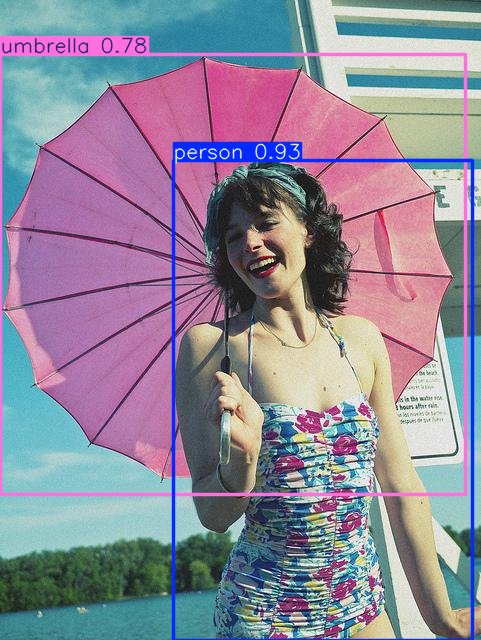

In [ ]:
results[0].show()

day-5 - build a streamlit simple app

Goal:deploy yolo model with a streamlit UI
*upload image or video
*display detection result

In [1]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

In [5]:
%%writefile app_streamlit.py

import streamlit as st

from ultralytics import YOLO #use pre-built yolo model and alos a option to upload our custom built mdel

import numpy as np

from PIL import Image

import cv2, tempfile, os, glob
#once the session complete can delete these temporary files
import pandas as pd

from pathlib import Path


st.set_page_config(page_title="Object Detection", layout="wide")

background_url = "https://i.ibb.co/zV8pbzqW/dooog.jpg"



st.markdown(

   f"""

   <style>

   .stApp {{

       background: url("{background_url}") no-repeat center center fixed;

       background-size: cover;

   }}

   /* Sidebar styling */

   section[data-testid="stSidebar"] {{

       background: rgba(0, 0, 0, 0.3);

       backdrop-filter: blur(10px);

       border-radius: 12px;

       padding: 10px;

   }}

   /* File uploader styling */

   div[data-testid="stFileUploader"] {{

       background: rgba(0, 0, 0, 0.3);

       backdrop-filter: blur(10px);

       border-radius: 12px;

       padding: 15px;

   }}

   /* DataFrame styling */

   .stDataFrame {{

       background: rgba(255, 255, 255, 0.85);

       border-radius: 12px;

       padding: 10px;

       box-shadow: 0 4px 10px rgba(0,0,0,0.3);

   }}

   /* Dark text */

   h1, h2, h3, h4, h5, h6, p, label, span, div {{

       color: #1a1a1a !important;

       font-weight: 500;

   }}

   </style>

   """,

   unsafe_allow_html=True   #streamlit doesn't support direct css have to include this line
                            #give owerwrite command

)


st.title("Object Detection")


uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])

conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)

img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)


@st.cache_resource

def load_model(weights_path="yolov8n.pt"): #if no custom model is uploaded

   return YOLO(weights_path)


def save_uploaded_file(uploaded_file, suffix=""):

   suffix = suffix if suffix else Path(uploaded_file.name).suffix

   tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)

   tf.write(uploaded_file.getbuffer()) #give some buffering time to upload

   tf.flush()

   return tf.name


def annotate_and_table(results, model):

   res = results[0]

   try:

       plotted = res.plot()

       annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)

   except Exception:

       annotated = res.orig_img if hasattr(res, "orig_img") else None


   detections = []

   try:

       boxes = res.boxes

       if boxes is not None and len(boxes) > 0:

           for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):

               name = model.names[int(c)]

               detections.append({"class": name, "conf": float(cf), "bbox": [float(x) for x in box]})

   except:

       detections = [] #if above go wrong anempty table will return without giving errors


   return annotated, pd.DataFrame(detections)


weights_to_load = "yolov8n.pt"

if uploaded_weights:

   weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt") #if vuven choose custom yolo model

   st.sidebar.success("Using uploaded weights")


model = load_model(weights_to_load)


mode = st.radio("Select input", ["Image upload", "Video upload"]) #can include live image,video capture also


if mode == "Image upload":

   uploaded = st.file_uploader("Upload image", type=["jpg","jpeg","png"])

   if uploaded:

       img = Image.open(uploaded).convert("RGB")

       st.image(img, caption="Input image")

       results = model.predict(np.array(img), conf=conf, imgsz=img_size)

       annotated, df = annotate_and_table(results, model)

       if annotated is not None:

           st.image(annotated, caption="Annotated")

       if not df.empty:

           st.dataframe(df)


elif mode == "Video upload":

   uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])

   if uploaded_vid:

       tmp = save_uploaded_file(uploaded_vid)

       st.video(tmp)

       project_dir = tempfile.mkdtemp()

       results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)

       try:

           out_dir = str(results[0].save_dir)

           vids = glob.glob(os.path.join(out_dir, "*"))

           vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]

           if vids:

               st.success("Annotated video")

               st.video(vids[0])

       except:

           st.warning("Could not display annotated video")





Overwriting app_streamlit.py


In [6]:
from pyngrok import ngrok #from collab connect withthe internet directly

NGROK_AUTH_TOKEN="32qCsW6YGNq8mQhgfyOhdwwjkUV_6eencYH9jTaHPF8h6GtRu"#unique for everyone
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

PUBLIC_URL=ngrok.connect(8501)
print("Public URL:",PUBLIC_URL)

!streamlit run app_streamlit.py --server.port 8501 &

import time #keep running the stream lit app and server
while True:
  time.sleep(60)

Public URL: NgrokTunnel: "https://f8481643e2fa.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.106.143:8501

2025-09-17 20:13:40.550 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_

0: 640x480 1 teddy bear, 424.0ms
Speed: 11.8ms preprocess, 424.0ms inference, 34.7ms postprocess per image at shape (1, 3, 640, 480)
2025-09-17 20:16:33.341 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_

0: 320x256 1 teddy bear, 70.3ms
Speed: 3.9ms preprocess, 70.3ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 256)
2025-09-17 20:25:08.446 Examining the path of torch.classes raised: Tried to instantiate class '__path_

KeyboardInterrupt: 